In [1]:

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Wedge, Circle
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime
import datetime

In [4]:
ds_1 = xr.open_dataset('reg.nc')
ds_2= xr.open_dataset("/N/project/Zli_lab/gongg/regrid_WRF/wrfout_d02_2012-09-30_00:00:00")

In [10]:
ds_2

<xarray.Dataset> Size: 1GB
Dimensions:                (Time: 1, south_north: 520, west_east: 600,
                            bottom_top: 46, bottom_top_stag: 47,
                            soil_layers_stag: 4, west_east_stag: 601,
                            south_north_stag: 521, seed_dim_stag: 2,
                            snow_layers_stag: 3, snso_layers_stag: 7)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 1MB ...
    XLONG                  (Time, south_north, west_east) float32 1MB ...
    XTIME                  (Time) datetime64[ns] 8B ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 1MB ...
    XLONG_U                (Time, south_north, west_east_stag) float32 1MB ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 1MB ...
    XLONG_V                (Time, south_north_stag, west_east) float32 1MB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                seed_dim_stag, snow_layers_stag,
                                snso_layers_stag
Data variables: (12/250)
    Times                  (Time) |S19 19B ...
    LU_INDEX               (Time, south_north, west_east) float32 1MB ...
    ZNU                    (Time, bottom_top) float32 184B ...
    ZNW                    (Time, bottom_top_stag) float32 188B ...
    ZS                     (Time, soil_layers_stag) float32 16B ...
    DZS                    (Time, soil_layers_stag) float32 16B ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 1MB ...
    PC                     (Time, south_north, west_east) float32 1MB ...
    LANDMASK               (Time, south_north, west_east) float32 1MB ...
    LAKEMASK               (Time, south_north, west_east) float32 1MB ...
    SST                    (Time, south_north, west_east) float32 1MB ...
    SST_INPUT              (Time, south_north, west_east) float32 1MB ...
Attributes: (12/149)
    TITLE:                            OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE:                      2012-09-28_00:00:00
    SIMULATION_START_DATE:           2012-04-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        601
    SOUTH-NORTH_GRID_DIMENSION:      521
    BOTTOM-TOP_GRID_DIMENSION:       47
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

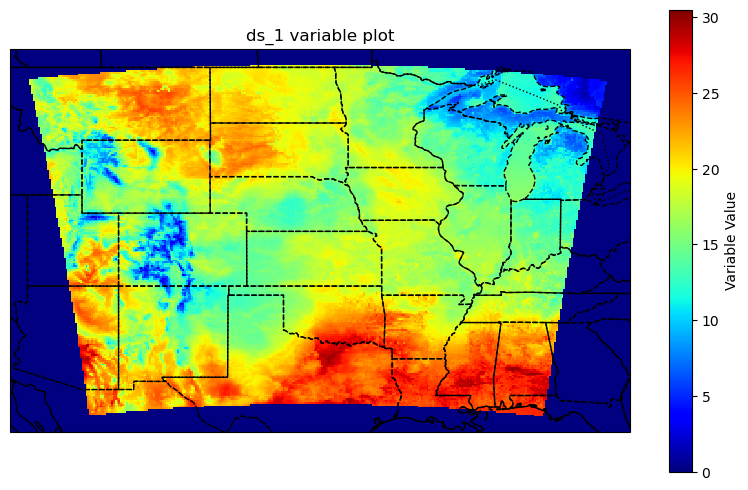

In [9]:
# 1. 如果你想给变量重命名，方便识别：
ds_1_renamed = ds_1.rename({"__xarray_dataarray_variable__": "var"})

# 2. 创建图形和投影坐标轴
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 3. 绘制数据
#   - x='lon', y='lat' 指定经纬度对应的坐标名称
#   - transform=ccrs.PlateCarree() 告诉 Cartopy 数据的原始投影是经纬度
#   - cmap 可根据需求调整颜色表
contour = ds_1_renamed["var"].plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    cbar_kwargs={"label": "Variable Value"}
)

# 4. 添加地理要素（可选）
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black', linestyle='--')

# 5. 如果需要限制绘图范围（例如美国部分区域）
ax.set_extent([-115, -81, 29, 50], crs=ccrs.PlateCarree())

# 6. 添加标题、显示图像
plt.title("ds_1 variable plot")
plt.show()

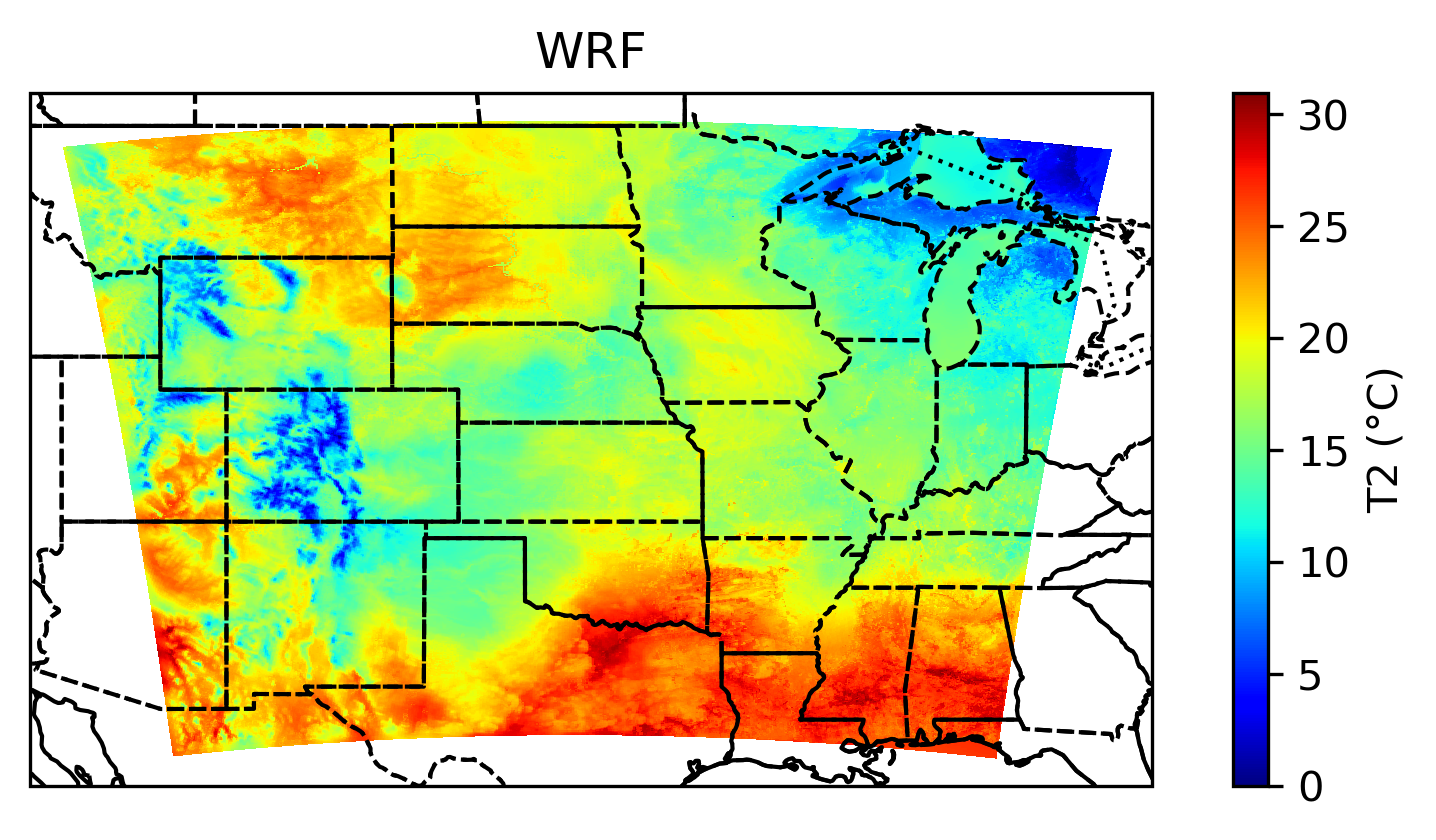

In [20]:


# 1) 选取需要的时间步，这里假设取第0个时间
ds_sel = ds_2.isel(Time=0)

# 2) 提取 T2、XLAT、XLONG
#    如果 T2 原本是 Kelvin，减去 273.15 转为摄氏度
T2 = ds_sel["T2"] - 273.15  
lat = ds_sel["XLAT"]
lon = ds_sel["XLONG"]

# 3) 创建图形并设置投影
fig = plt.figure(figsize=(7, 3), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

# 4) 在地图上绘制 T2
#    transform=ccrs.PlateCarree() 告诉 Cartopy，lon/lat 是地理坐标
#    cmap="jet" 仅作为示例，你可以选择其他色表
mesh = ax.pcolormesh(lon, lat, T2, 
                     transform=ccrs.PlateCarree(),
                     cmap="jet")

# 5) 添加地理要素和颜色条
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, edgecolor="black", linestyle="--")
plt.colorbar(mesh, ax=ax, label="T2 (°C)")

# 6) （可选）设置地图显示范围，比如美国中东部
ax.set_extent([-115, -81, 29, 50], crs=ccrs.PlateCarree())

plt.title("WRF")
plt.show()


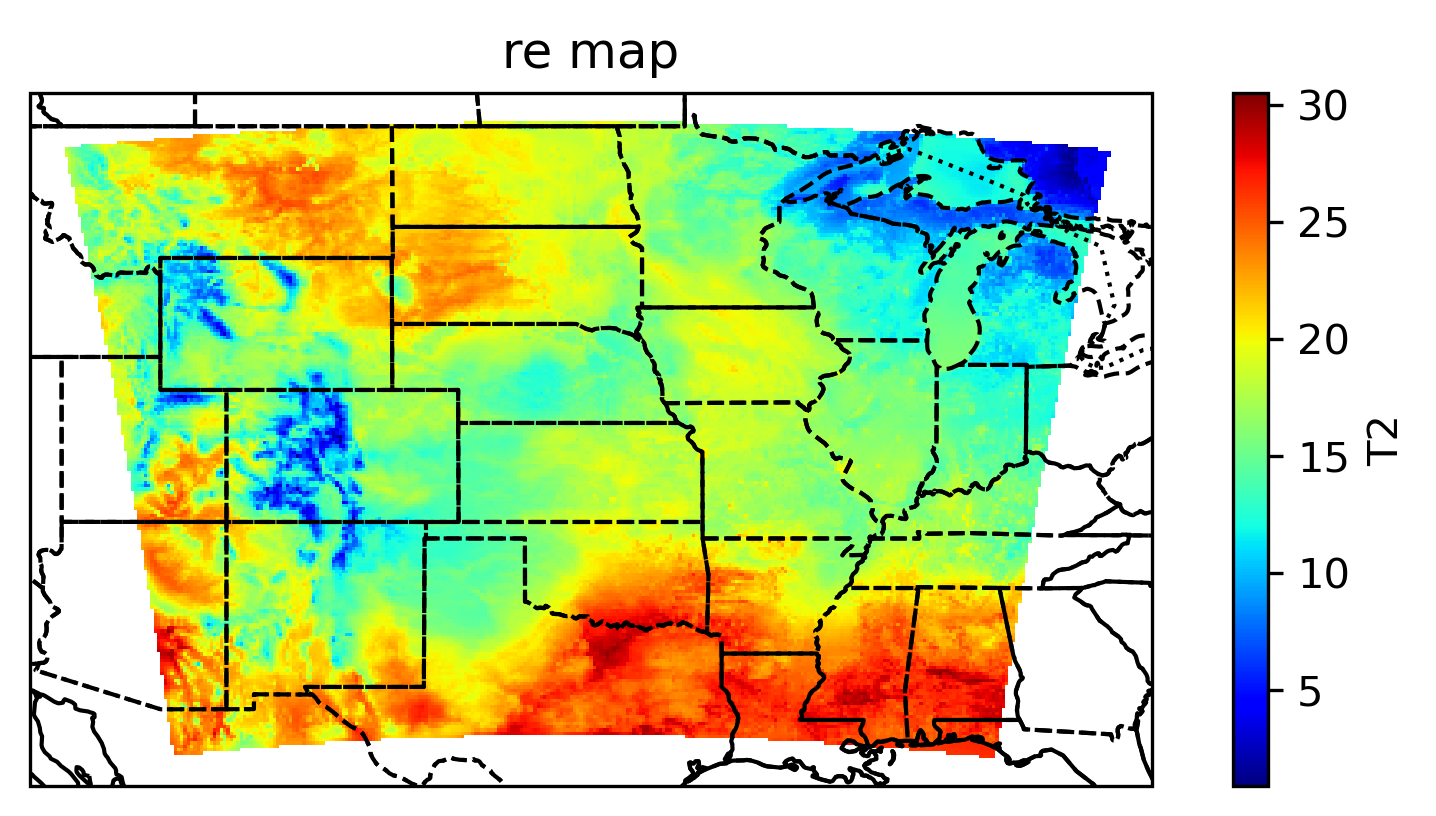

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 假设 ds_1_renamed["var"] 是一个 2D 数据变量 (lat, lon)
# 将所有 0 替换为 NaN
ds_1_renamed["var"] = ds_1_renamed["var"].where(ds_1_renamed["var"] != 0, np.nan)

# 创建绘图
fig = plt.figure(figsize=(7, 3), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制 ds_1_renamed["var"]，注意已将 0 替换为 NaN
contour = ds_1_renamed["var"].plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    cbar_kwargs={"label": "T2"}  # colorbar 标签
)

# 添加地理要素
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black', linestyle='--')

# 设置地图显示范围 (可根据需求调整)
ax.set_extent([-115, -81, 29, 50], crs=ccrs.PlateCarree())

plt.title("re map")
plt.show()

